In [1]:
data = read.csv("./data/ageinc_g.csv")
data$X = NULL

In [2]:
head(data)

,income,age,gender
,<int>,<int>,<chr>
1,101743,58,Female
2,49597,27,Female
3,36517,52,Male
4,33223,49,Male
5,72994,53,Female
6,38361,26,Female


In [3]:
nrow(data)

[1] 1000

In [4]:
ncol(data)

[1] 3

In [5]:
str(data)

'data.frame':	1000 obs. of  3 variables:
 $ income: int  101743 49597 36517 33223 72994 38361 48579 115248 11527 54096 ...
 $ age   : int  58 27 52 49 53 26 29 24 31 51 ...
 $ gender: chr  "Female" "Female" "Male" "Male" ...


In [6]:
summary(data)

     income            age           gender         
 Min.   :     0   Min.   :18.00   Length:1000       
 1st Qu.: 46402   1st Qu.:30.00   Class :character  
 Median : 78994   Median :39.00   Mode  :character  
 Mean   : 80117   Mean   :39.41                     
 3rd Qu.:114810   3rd Qu.:49.00                     
 Max.   :179294   Max.   :63.00                     

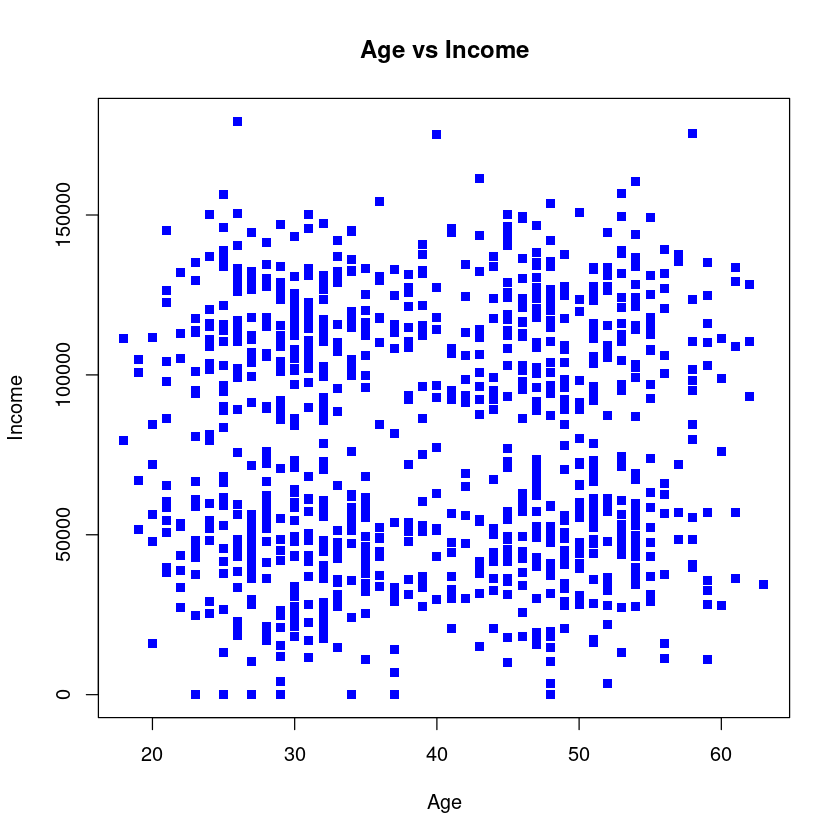

In [7]:
plot(x = data$age,
     y = data$income,
     xlab = "Age", ylab = "Income",
     main = "Age vs Income",
     pch = 15, col = 'blue')

> **Nhận xét**
> * Có thể chọn $k = 4$ cho dataset này

In [8]:
wss = (nrow(data) - 1) * sum(apply(data[, c('age', 'income')], 2, var))

wss

[1] 1.53999e+12

In [9]:
for (i in 1:6) {
    wss[i] = sum(kmeans(data[, c('age', 'income')], 
                        centers = i, nstart = 20)$withinss)
}

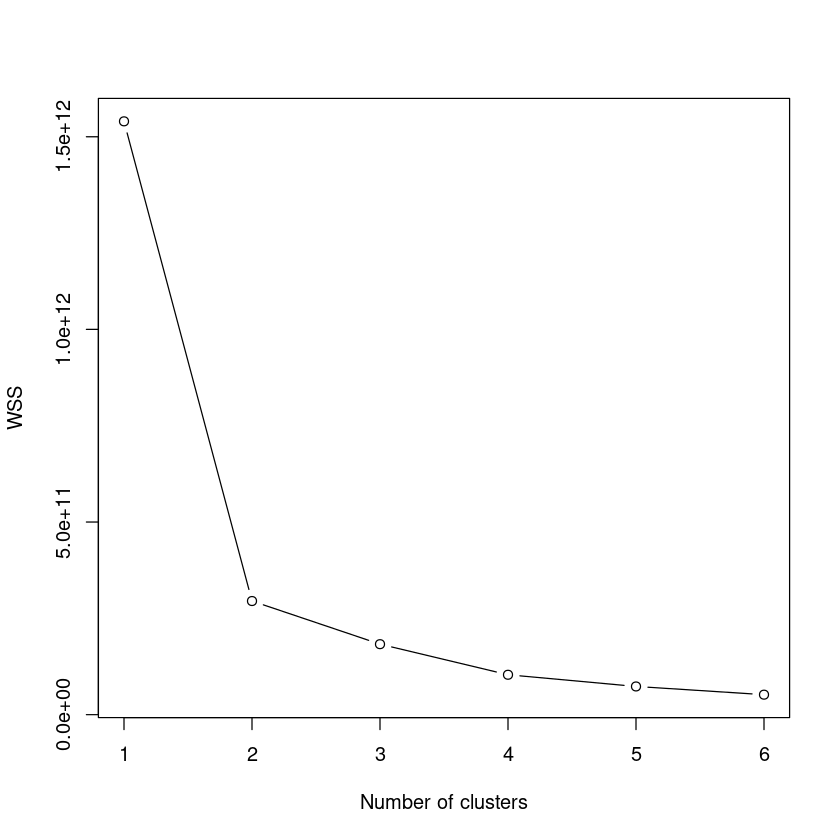

In [10]:
plot(1:6, wss, type = 'b',
     xlab = "Number of clusters",
     ylab = "WSS")

* Chọn $k = 2$

In [11]:
set.seed(20)
data.cluster = kmeans(data[, c('age', 'income')], 
                      centers = 2, nstart = 20)

In [12]:
print(data.cluster)

K-means clustering with 2 clusters of sizes 504, 496

Cluster means:
       age    income
1 39.63889  45112.88
2 39.17742 115685.33

Clustering vector:
   [1] 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 2 1 1 1 2 2 2 1 2 2 1 2 2 1 1 1 2 2 2 1
  [38] 1 1 2 1 1 2 2 2 2 2 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2 2 1 2 2 2
  [75] 1 1 1 2 2 2 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1
 [112] 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 2 1 1 2 2 1 1 2 2 1 2 1 2 1 1 1 1 2 1 1 2 2
 [149] 2 1 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 2
 [186] 2 2 2 2 2 2 1 1 1 1 1 2 2 2 1 2 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 2 1 2 1 2 2
 [223] 1 2 2 2 1 1 1 2 2 1 2 2 1 2 1 2 1 2 2 1 1 2 1 2 2 1 1 2 1 1 1 1 1 1 2 2 2
 [260] 2 2 1 2 2 1 2 2 1 2 1 1 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 2 2 1 2
 [297] 1 2 2 1 2 1 2 2 1 1 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2
 [334] 2 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 2 1 2
 [371] 1 2 1 1 2 1 1 1 1 1 2 1 1 2 2 2

In [13]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



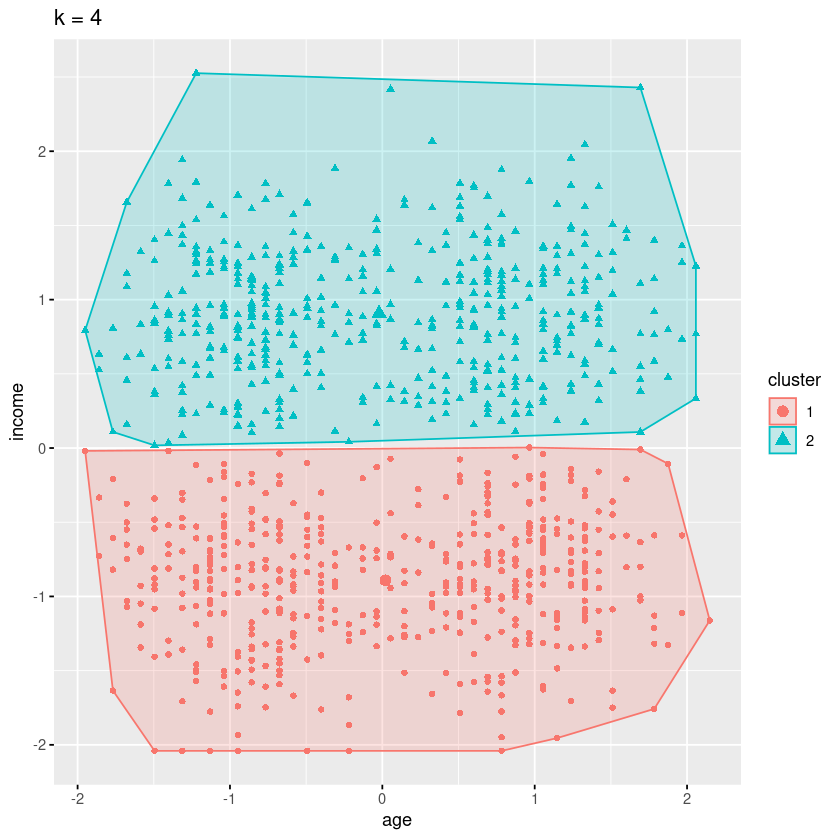

In [14]:
fviz_cluster(data.cluster, geom = 'point', 
             data = data[, c('age', 'income')]) +
             ggtitle("k = 4")

> **Nhận xét**
> * K-Means xem ra ko phải là thuật toán tốt cho model này, vì các cluster nhìn chung có dạng ko phải hình cầu.
> * Thêm một điều nữa là boundary giữa các cluster quá sát nhau, ko tạo ra sự khác biệt lớn giữa các cluster.